<a href="https://colab.research.google.com/github/Priyankagautam08/8-Real-world-Ml-Projects/blob/main/Project_1_Car_Purchasing_Amount.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns


In [ ]:
car_df = pd.read_csv('Car_Purchasing_Data.csv', encoding = 'ISO-8859-1')

In [ ]:
car_df

,Customer Name,Customer e-mail,Country,Gender,Age,Annual Salary,Credit Card Debt,Net Worth,Car Purchase Amount
0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,Bulgaria,0,41.851720,62812.09301,11609.380910,238961.2505,35321.45877
1,Harlan Barnes,eu.dolor@diam.co.uk,Belize,0,40.870623,66646.89292,9572.957136,530973.9078,45115.52566
2,Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradip...,Algeria,1,43.152897,53798.55112,11160.355060,638467.1773,42925.70921
3,Jade Cunningham,malesuada@dignissim.com,Cook Islands,1,58.271369,79370.03798,14426.164850,548599.0524,67422.36313
4,Cedric Leach,felis.ullamcorper.viverra@egetmollislectus.net,Brazil,1,57.313749,59729.15130,5358.712177,560304.0671,55915.46248
...,...,...,...,...,...,...,...,...,...
495,Walter,ligula@Cumsociis.ca,Nepal,0,41.462515,71942.40291,6995.902524,541670.1016,48901.44342
496,Vanna,Cum.sociis.natoque@Sedmolestie.edu,Zimbabwe,1,37.642000,56039.49793,12301.456790,360419.0988,31491.41457
497,Pearl,penatibus.et@massanonante.com,Philippines,1,53.943497,68888.77805,10611.606860,764531.3203,64147.28888
498,Nell,Quisque.varius@arcuVivamussit.net,Botswana,1,59.160509,49811.99062,14013.034510,337826.6382,45442.15353


In [ ]:
car_df.head(5)

,Customer Name,Customer e-mail,Country,Gender,Age,Annual Salary,Credit Card Debt,Net Worth,Car Purchase Amount
0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,Bulgaria,0,41.851720,62812.09301,11609.380910,238961.2505,35321.45877
1,Harlan Barnes,eu.dolor@diam.co.uk,Belize,0,40.870623,66646.89292,9572.957136,530973.9078,45115.52566
2,Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradip...,Algeria,1,43.152897,53798.55112,11160.355060,638467.1773,42925.70921
3,Jade Cunningham,malesuada@dignissim.com,Cook Islands,1,58.271369,79370.03798,14426.164850,548599.0524,67422.36313
4,Cedric Leach,felis.ullamcorper.viverra@egetmollislectus.net,Brazil,1,57.313749,59729.15130,5358.712177,560304.0671,55915.46248


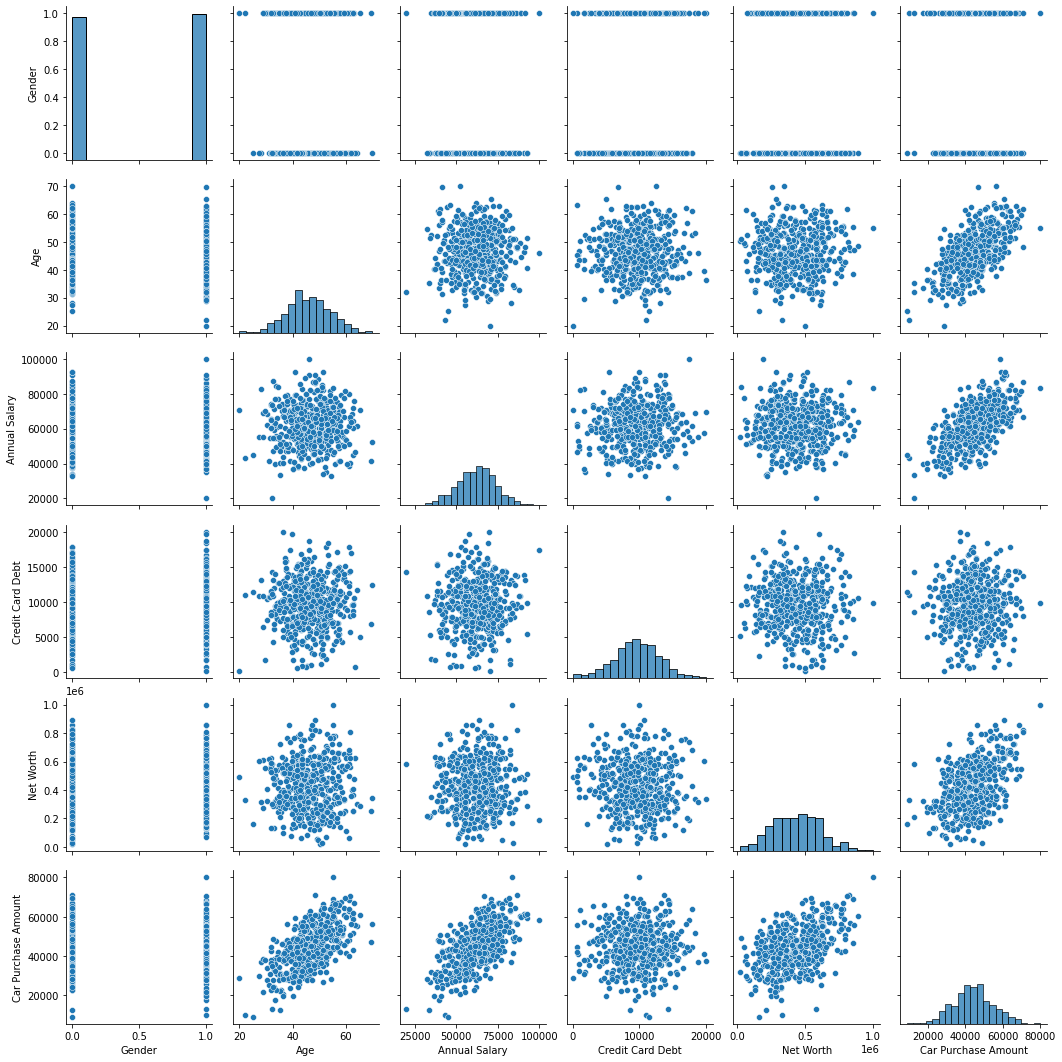

In [ ]:
sns.pairplot(car_df)

Creating Testing and training Dataset/Data cleaning

In [ ]:
# drop the customer name as it doesnt effect the data or the email or the country puting axis=1 means the entire column
#drop the car purchase amount as it is the target variable or output value 
X= car_df.drop(['Customer Name' ,'Country','Customer e-mail','Car Purchase Amount'], axis=1)

In [ ]:
X

,Gender,Age,Annual Salary,Credit Card Debt,Net Worth
0,0,41.851720,62812.09301,11609.380910,238961.2505
1,0,40.870623,66646.89292,9572.957136,530973.9078
2,1,43.152897,53798.55112,11160.355060,638467.1773
3,1,58.271369,79370.03798,14426.164850,548599.0524
4,1,57.313749,59729.15130,5358.712177,560304.0671
...,...,...,...,...,...
495,0,41.462515,71942.40291,6995.902524,541670.1016
496,1,37.642000,56039.49793,12301.456790,360419.0988
497,1,53.943497,68888.77805,10611.606860,764531.3203
498,1,59.160509,49811.99062,14013.034510,337826.6382


In [ ]:
y= car_df['Car Purchase Amount']

In [ ]:
y

0      35321.45877
1      45115.52566
2      42925.70921
3      67422.36313
4      55915.46248
          ...     
495    48901.44342
496    31491.41457
497    64147.28888
498    45442.15353
499    45107.22566
Name: Car Purchase Amount, Length: 500, dtype: float64

In [ ]:
y.shape

(500,)

In [ ]:
#now we need to normalize the date to have better prediction 
#here we are using min-max scaling (ranges from 0 to 1)

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
X_scaled.shape

(500, 5)

In [ ]:
scaler.data_max_

array([1.e+00, 7.e+01, 1.e+05, 2.e+04, 1.e+06])

In [ ]:
scaler.data_min_

array([    0.,    20., 20000.,   100., 20000.])

In [ ]:
#similarly on y or target
#y_scaled = scaler.fit_transform(y). #this will show error as reshare need to done y.shape = 500

y = y.values.reshape(-1,1)
y_scaled = scaler.fit_transform(y)



In [ ]:
y_scaled.shape

(500, 1)

Model training  : 
take the training data we divide the training data into training and testing

In [ ]:
X_scaled.shape

(500, 5)

In [ ]:
#use train test split from sklearn

from sklearn.model_selection import train_test_split

X_train, X_test,y_train, y_test= train_test_split(X_scaled, y_scaled,test_size=0.25) #30 split 70 in train, 30 in test

In [ ]:
X_train.shape

(375, 5)

In [ ]:
X_test.shape

(125, 5)

In [ ]:
import tensorflow.keras            #(keras api which sits over tensorflow)
from keras.models import Sequential #model building in sequential form
from keras.layers import Dense       #fully connected

model = Sequential()
model.add(Dense(25, input_dim=5, activation='relu')) #5 input variable
#add additional hidden layers
model.add(Dense(25, activation='relu'))
model.add (Dense(1, activation='linear')) # we need only 1 output as prediction

In [ ]:
model.summary() #(+25 biases )

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 25)                150       
_________________________________________________________________
dense_1 (Dense)              (None, 25)                650       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 26        
Total params: 826
Trainable params: 826
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#mini challenge with 40 neurons in each layers

model = Sequential()
model.add(Dense(40, input_dim=5, activation='relu')) #5 input variable
#add additional hidden layers
model.add(Dense(40, activation='relu'))
model.add (Dense(1, activation='linear')) # we need only 1 output as prediction


In [ ]:
model.summary(). #40 baises (40*5+40) #second 40*40+40

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 40)                240       
_________________________________________________________________
dense_10 (Dense)             (None, 40)                1640      
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 41        
Total params: 1,921
Trainable params: 1,921
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
X_train.shape

(375, 5)

In [ ]:
epochs_hist = model.fit(X_train, y_train, epochs=2, batch_size=25,  verbose=1, validation_split=0.2) #to avoid overfitting we add validaion

Epoch 1/100
6/6 [==============================] - 0s 29ms/step - loss: 6.8786e-06 - val_loss: 1.6311e-05
Epoch 2/100
6/6 [==============================] - 0s 9ms/step - loss: 6.0155e-06 - val_loss: 1.6407e-05
Epoch 3/100
6/6 [==============================] - 0s 8ms/step - loss: 6.6259e-06 - val_loss: 1.6030e-05
Epoch 4/100
6/6 [==============================] - 0s 43ms/step - loss: 6.2502e-06 - val_loss: 1.5101e-05
Epoch 5/100
6/6 [==============================] - 0s 9ms/step - loss: 5.7861e-06 - val_loss: 1.5866e-05
Epoch 6/100
6/6 [==============================] - 0s 9ms/step - loss: 6.3239e-06 - val_loss: 1.5039e-05
Epoch 7/100
6/6 [==============================] - 0s 9ms/step - loss: 5.7572e-06 - val_loss: 1.4882e-05
Epoch 8/100
6/6 [==============================] - 0s 8ms/step - loss: 5.6570e-06 - val_loss: 1.4942e-05
Epoch 9/100
6/6 [==============================] - 0s 9ms/step - loss: 5.6459e-06 - val_loss: 1.4803e-05
Epoch 10/100
6/6 [==============================] - 0

In [ ]:
X_train.shape

(375, 5)

mOdel evaluation

In [ ]:
print(epochs_hist.history.keys())

dict_keys(['loss', 'val_loss'])


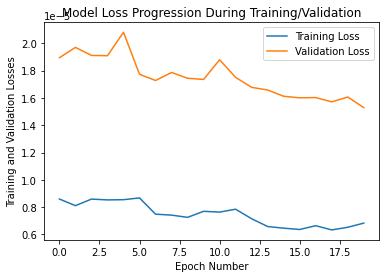

In [ ]:
import matplotlib.pyplot as plt
plt.plot(epochs_hist.history['loss'])
plt.plot(epochs_hist.history['val_loss'])

plt.title('Model Loss Progression During Training/Validation')
plt.ylabel('Training and Validation Losses')
plt.xlabel('Epoch Number')
plt.legend(['Training Loss', 'Validation Loss'])